Number of records in the dataset: 149

Number of releases in each genre:
 Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64

The genre with the highest number of releases: Comedy

Movies released in each genre across different release times:
 ReleaseTime  FS  HS  LW   N
Genre                      
 Drama        4   6   1  24
Action        3   3   3  12
Action        0   0   0   3
Comedy        3   5   5  23
Romance       3   3   4  15
Thriller      4   1   1  20
Thriller      0   0   1   2

Number of movie releases in each month:
1     20
2     16
3     19
4     11
5     18
6     10
7     16
8      8
9     10
10     9
11    10
12     2
Name: Month, dtype: int64

Month-wise releases of high-budgeted movies (>= 25 crore):
1     8
2     9
3     7
4     4
5     3
6     5
7     6
8     7
9     5
10    4
11    6
12    2
Name: Month, dtype: int64

Top 10 movies with maximum ROI:
                      Movie

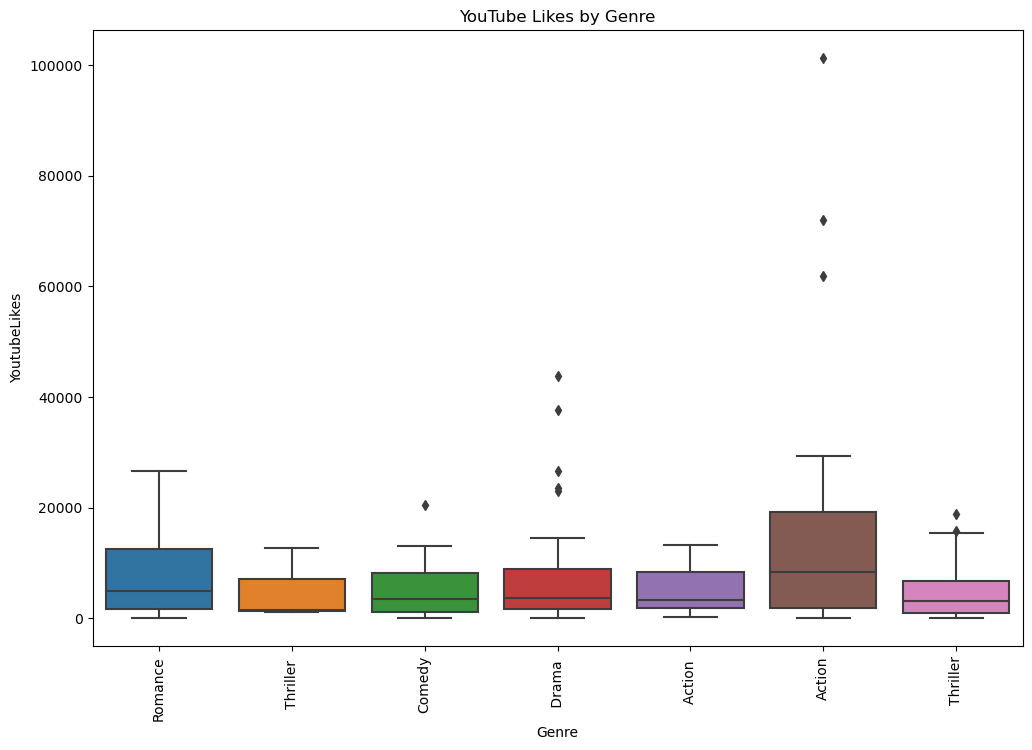


Correlation Matrix:
                        Budget  BoxOfficeCollection  YoutubeViews  \
Budget               1.000000             0.650401      0.589038   
BoxOfficeCollection  0.650401             1.000000      0.588632   
YoutubeViews         0.589038             0.588632      1.000000   
YoutubeLikes         0.608916             0.682517      0.884055   
YoutubeDislikes      0.665343             0.623941      0.846739   

                     YoutubeLikes  YoutubeDislikes  
Budget                   0.608916         0.665343  
BoxOfficeCollection      0.682517         0.623941  
YoutubeViews             0.884055         0.846739  
YoutubeLikes             1.000000         0.859730  
YoutubeDislikes          0.859730         1.000000  


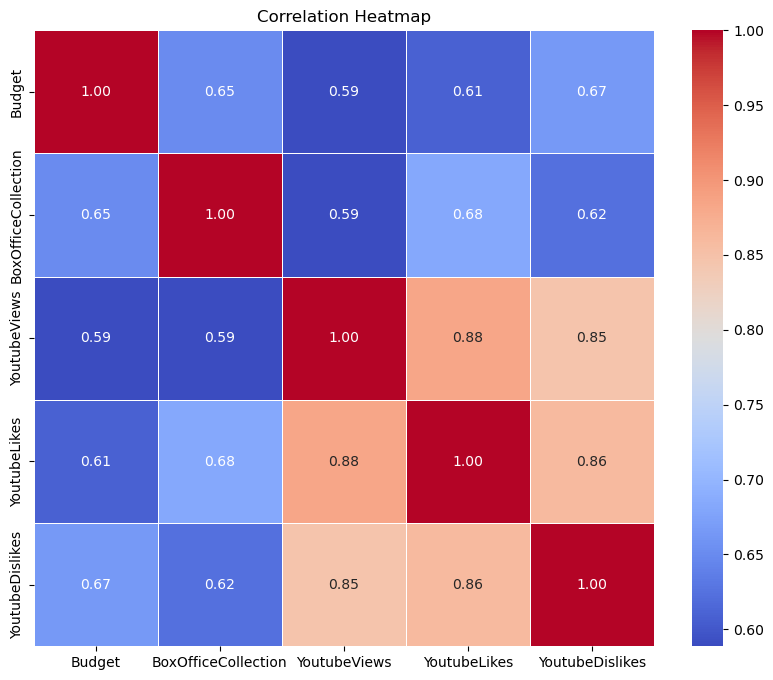

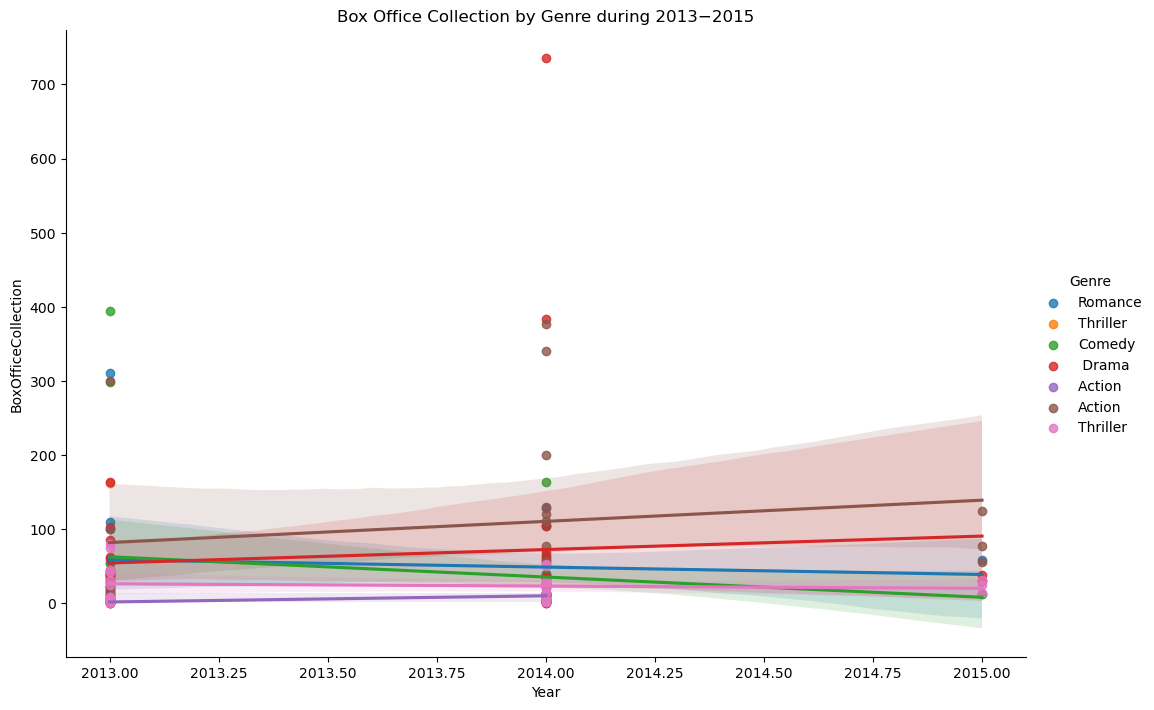

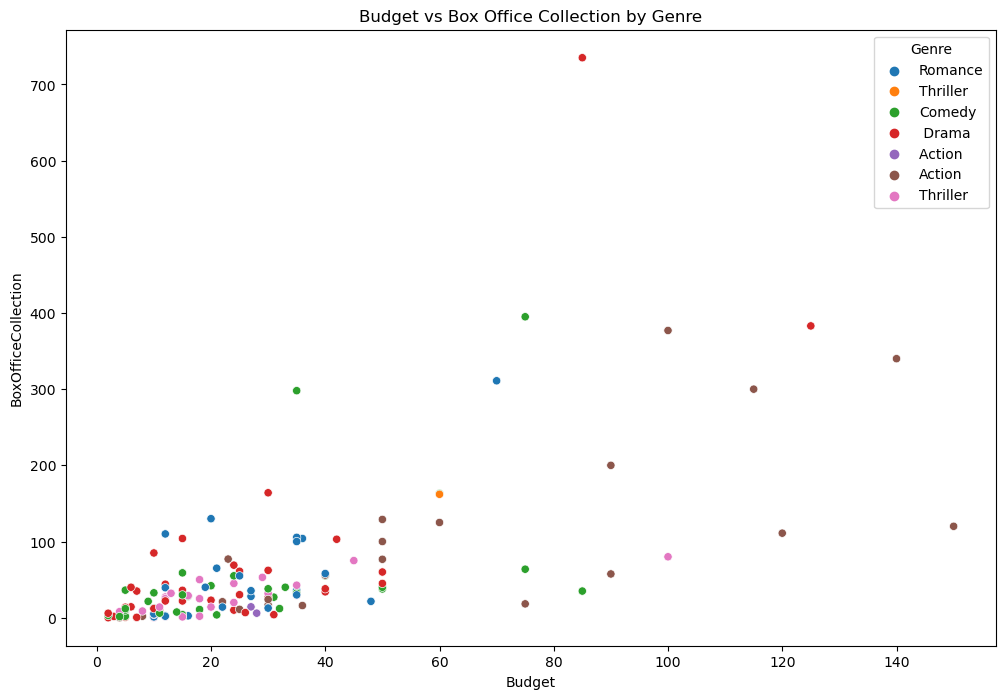

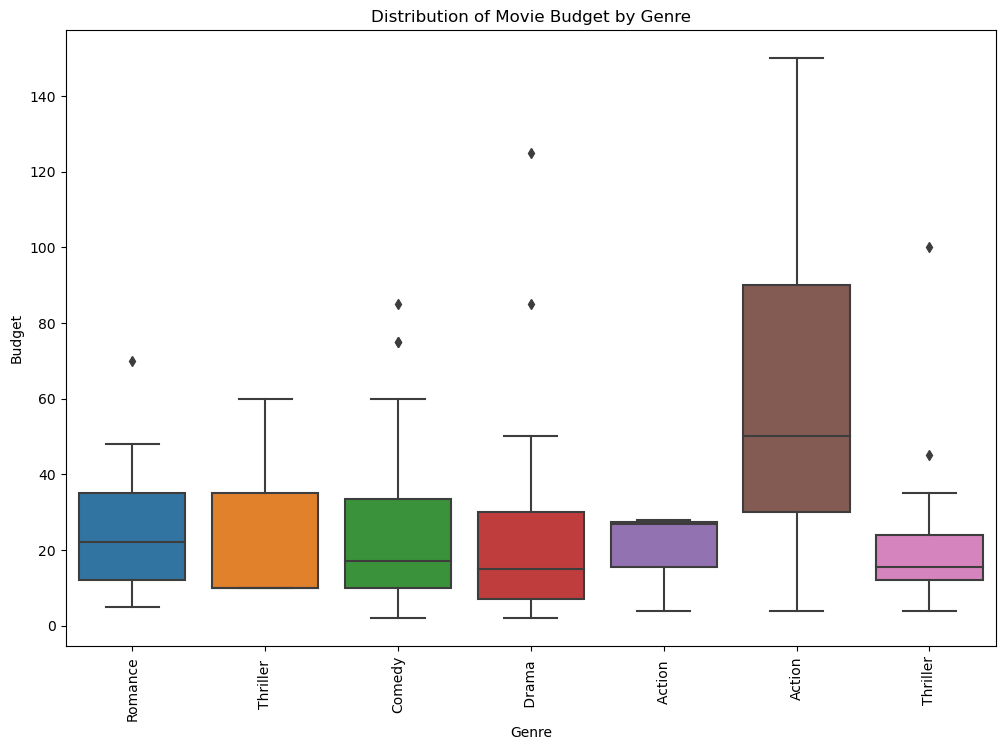


Number of movies released each year:
2013    67
2014    70
2015    12
Name: Year, dtype: int64


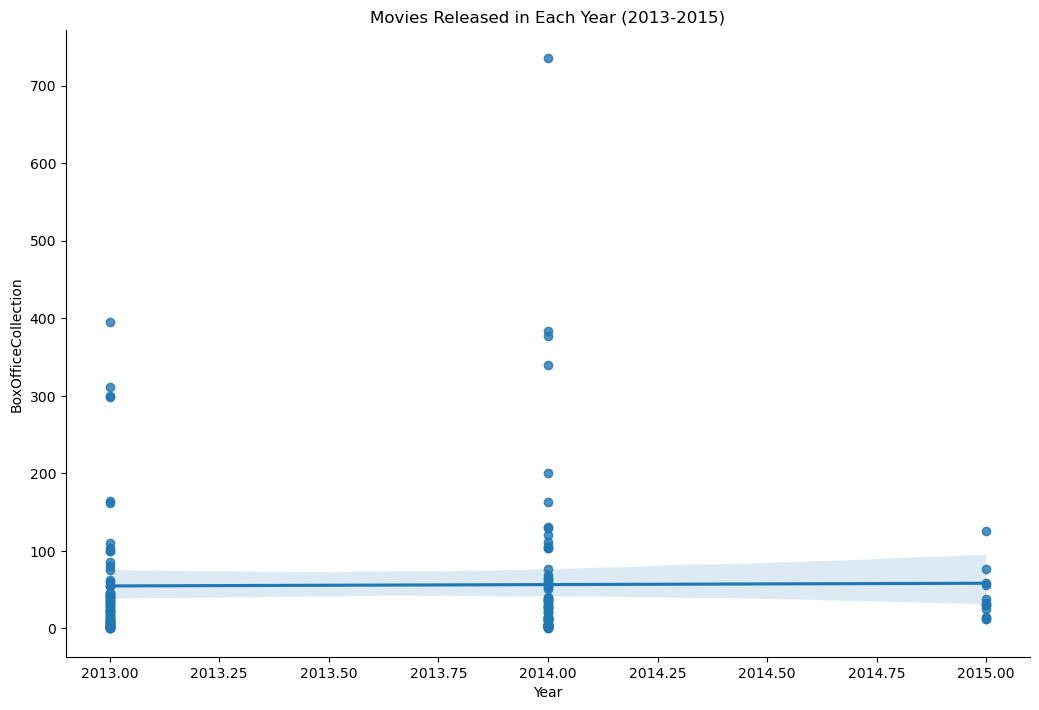

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
bollywood_df = pd.read_csv("C:\\Users\\maths\\Desktop\\ojas_230957162\\fml\\week1\\bollywood.csv") 


num_records = bollywood_df.shape[0]
print(f"Number of records in the dataset: {num_records}")

genre_count = bollywood_df['Genre'].value_counts().sort_values(ascending=False)
print("\nNumber of releases in each genre:\n", genre_count)


top_genre = genre_count.idxmax()
print(f"\nThe genre with the highest number of releases: {top_genre}")

release_time_genre = pd.crosstab(bollywood_df['Genre'], bollywood_df['ReleaseTime'])
print("\nMovies released in each genre across different release times:\n", release_time_genre)


bollywood_df['ReleaseDate'] = pd.to_datetime(bollywood_df['Release Date'])
bollywood_df['Month'] = bollywood_df['ReleaseDate'].dt.month
month_release_count = bollywood_df['Month'].value_counts().sort_index()
print(f"\nNumber of movie releases in each month:\n{month_release_count}")


high_budget_movies = bollywood_df[bollywood_df['Budget'] >= 25]
high_budget_months = high_budget_movies['Month'].value_counts().sort_index()
print(f"\nMonth-wise releases of high-budgeted movies (>= 25 crore):\n{high_budget_months}")


bollywood_df['ROI'] = (bollywood_df['BoxOfficeCollection'] - bollywood_df['Budget']) / bollywood_df['Budget']
top_10_roi_movies = bollywood_df[['MovieName', 'ROI']].sort_values(by='ROI', ascending=False).head(10)
print("\nTop 10 movies with maximum ROI:\n", top_10_roi_movies)


average_roi_by_release_time = bollywood_df.groupby('ReleaseTime')['ROI'].mean()
print("\nAverage ROI for different release times:\n", average_roi_by_release_time)


correlation_box_office_likes = bollywood_df[['BoxOfficeCollection', 'YoutubeLikes']].corr().iloc[0, 1]
print(f"\nCorrelation between Box Office Collection and YouTube Likes: {correlation_box_office_likes}")
if correlation_box_office_likes > 0:
    print("The correlation is positive.")
else:
    print("The correlation is negative.")


plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='YoutubeLikes', data=bollywood_df)
plt.title('YouTube Likes by Genre')
plt.xticks(rotation=90)
plt.show()

correlation_matrix = bollywood_df[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


bollywood_df['Year'] = bollywood_df['ReleaseDate'].dt.year
sns.lmplot(x='Year', y='BoxOfficeCollection', hue='Genre', data=bollywood_df, aspect=1.5, height=7)
plt.title('Box Office Collection by Genre during 2013−2015')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Budget', y='BoxOfficeCollection', hue='Genre', data=bollywood_df)
plt.title('Budget vs Box Office Collection by Genre')
plt.show()


plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Budget', data=bollywood_df)
plt.title('Distribution of Movie Budget by Genre')
plt.xticks(rotation=90)
plt.show()


yearly_release_count = bollywood_df['Year'].value_counts().sort_index()
print(f"\nNumber of movies released each year:\n{yearly_release_count}")


sns.lmplot(x='Year', y='BoxOfficeCollection', data=bollywood_df, aspect=1.5, height=7, fit_reg=True)
plt.title('Movies Released in Each Year (2013-2015)')
plt.show()
